### keras를 활용한 소프트맥스

In [ ]:
import pandas as pd

In [6]:
data=pd.read_csv("data/iris.csv")
print(len(data))
print(data[:5])
print(data['Species'].unique())

150
   sepal.length  sepal.width  petal.length  petal.width Species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
['Setosa' 'Versicolor' 'Virginica']


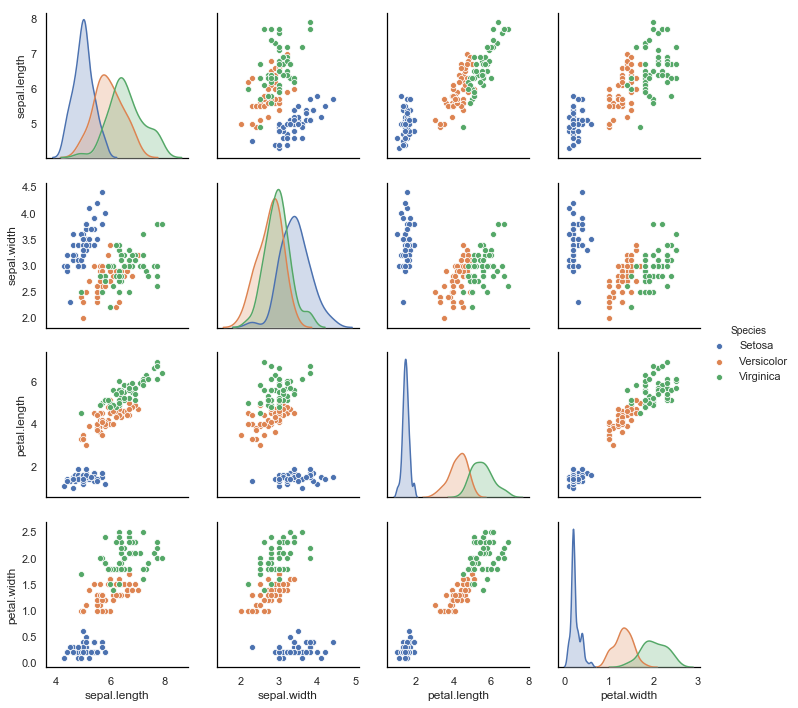

In [9]:
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})
sns.pairplot(data, hue="Species")

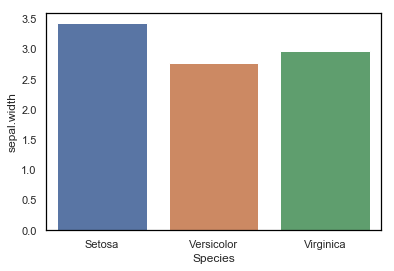

In [12]:
sns.barplot(data['Species'], data['sepal.width'], ci=None) # ci:오차 제거

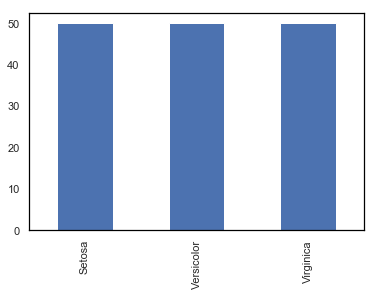

In [15]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

In [22]:
# 소프트맥스 회귀에 적용하기 위해서는 Species를 숫자형으로 변환해줘야함
data['Species']=data['Species'].replace(['Setosa','Versicolor','Virginica'],[0,1,2])

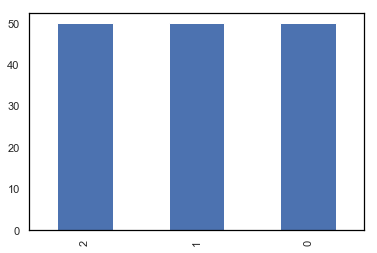

In [23]:
data['Species'].value_counts().plot(kind='bar')

In [30]:
# 데이터프레임 자료구조에서 2차원 array로 변환
datax=data[["sepal.length","sepal.width","petal.length","petal.width"]].values
datay=data["Species"].values

In [31]:
print(datax[:5])
print(datay[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
(xtrain,xtest,ytrain,ytest)=train_test_split(datax,datay, train_size=0.8, random_state=1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
ytrain

array([1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 0], dtype=int64)

In [37]:
# 데이터 y 원핫인코딩
from keras.utils import np_utils
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)

In [40]:
print(ytrain)
print(ytest)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [41]:
# 소프트맥스 회귀
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [46]:
model=Sequential()
model.add(Dense(3, input_dim=4,activation='softmax')) # Dense(출력결과 차원, 입력데이터 차원)
sgd=optimizers.SGD(lr=0.01) # 학습률
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 이진분류 : binary_crossentropy, 다중분류 : categorical_crossentropy
history=model.fit(xtrain, ytrain, batch_size=1, epochs=200, validation_data=(xtest,ytest)) # 모델을 피팅하는 과정 수행

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 3.3730 - acc: 0.3083 - val_loss: 2.4587 - val_acc: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 748us/step - loss: 2.1584 - acc: 0.3083 - val_loss: 1.8126 - val_acc: 0.4333
Epoch 3/200
120/120 [==============================] - 0s 723us/step - loss: 1.5655 - acc: 0.3000 - val_loss: 1.5042 - val_acc: 0.4000
Epoch 4/200
120/120 [==============================] - 0s 715us/step - loss: 1.2753 - acc: 0.3250 - val_loss: 1.2761 - val_acc: 0.1667
Epoch 5/200
120/120 [==============================] - 0s 690us/step - loss: 1.1110 - acc: 0.3000 - val_loss: 1.1301 - val_acc: 0.2333
Epoch 6/200
120/120 [==============================] - 0s 657us/step - loss: 1.0172 - acc: 0.3167 - val_loss: 1.0550 - val_acc: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 756us/step - loss: 0.9521 - acc: 0.3750 - val_loss: 0.9645 - val_acc: 0.3000
Epoch 8/200


Epoch 61/200
120/120 [==============================] - 0s 698us/step - loss: 0.3516 - acc: 0.9167 - val_loss: 0.3893 - val_acc: 0.8333
Epoch 62/200
120/120 [==============================] - 0s 657us/step - loss: 0.3507 - acc: 0.9000 - val_loss: 0.3704 - val_acc: 0.9333
Epoch 63/200
120/120 [==============================] - 0s 723us/step - loss: 0.3469 - acc: 0.9250 - val_loss: 0.3675 - val_acc: 0.9333
Epoch 64/200
120/120 [==============================] - 0s 657us/step - loss: 0.3442 - acc: 0.9250 - val_loss: 0.3608 - val_acc: 0.9667
Epoch 65/200
120/120 [==============================] - 0s 640us/step - loss: 0.3411 - acc: 0.9167 - val_loss: 0.3660 - val_acc: 0.8667
Epoch 66/200
120/120 [==============================] - 0s 657us/step - loss: 0.3371 - acc: 0.9500 - val_loss: 0.3629 - val_acc: 0.9000
Epoch 67/200
120/120 [==============================] - 0s 632us/step - loss: 0.3356 - acc: 0.9167 - val_loss: 0.3604 - val_acc: 0.9000
Epoch 68/200
120/120 [==========================

120/120 [==============================] - 0s 731us/step - loss: 0.2349 - acc: 0.9417 - val_loss: 0.2550 - val_acc: 1.0000
Epoch 122/200
120/120 [==============================] - 0s 648us/step - loss: 0.2333 - acc: 0.9500 - val_loss: 0.2607 - val_acc: 0.9667
Epoch 123/200
120/120 [==============================] - 0s 632us/step - loss: 0.2323 - acc: 0.9583 - val_loss: 0.2550 - val_acc: 0.9667
Epoch 124/200
120/120 [==============================] - 0s 657us/step - loss: 0.2314 - acc: 0.9500 - val_loss: 0.2565 - val_acc: 0.9667
Epoch 125/200
120/120 [==============================] - 0s 648us/step - loss: 0.2290 - acc: 0.9500 - val_loss: 0.2527 - val_acc: 0.9667
Epoch 126/200
120/120 [==============================] - 0s 648us/step - loss: 0.2286 - acc: 0.9500 - val_loss: 0.2560 - val_acc: 0.9667
Epoch 127/200
120/120 [==============================] - 0s 657us/step - loss: 0.2302 - acc: 0.9583 - val_loss: 0.2457 - val_acc: 1.0000
Epoch 128/200
120/120 [==============================] 

In [50]:
history.history['acc']

[0.30833333333333335,
 0.30833333333333335,
 0.3,
 0.325,
 0.3,
 0.31666666666666665,
 0.375,
 0.5666666666666667,
 0.6666666666666666,
 0.6833333333333333,
 0.6833333333333333,
 0.6916666666666667,
 0.675,
 0.6916666666666667,
 0.6833333333333333,
 0.675,
 0.6916666666666667,
 0.6916666666666667,
 0.7833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.775,
 0.7,
 0.6916666666666667,
 0.7333333333333333,
 0.775,
 0.7416666666666667,
 0.725,
 0.8333333333333334,
 0.7583333333333333,
 0.75,
 0.7916666666666666,
 0.8083333333333333,
 0.8583333333333333,
 0.8083333333333333,
 0.8416666666666667,
 0.7416666666666667,
 0.8083333333333333,
 0.8416666666666667,
 0.8833333333333333,
 0.825,
 0.875,
 0.85,
 0.8416666666666667,
 0.9,
 0.85,
 0.8833333333333333,
 0.9083333333333333,
 0.9,
 0.8916666666666667,
 0.9166666666666666,
 0.8916666666666667,
 0.9,
 0.9083333333333333,
 0.8916666666666667,
 0.9166666666666666,
 0.9,
 0.925,
 0.8916666666666667,
 0.95,
 0.9166666666666666,
 0.9,
 

In [48]:
history.history['loss']

[3.373005346065232,
 2.158442353333036,
 1.5654921231170495,
 1.2752501204609872,
 1.110994865000248,
 1.0172284975647927,
 0.9521484553813935,
 0.8964853207270305,
 0.8469277121126652,
 0.808511454363664,
 0.7711355778078238,
 0.7405024332304796,
 0.7119344552357991,
 0.6863440622886022,
 0.6655180263022582,
 0.6466245939334233,
 0.6273270814369122,
 0.6102518290281296,
 0.596741774554054,
 0.5837661534547806,
 0.5704955130815506,
 0.5573640450835228,
 0.5493789409597715,
 0.5351224896187584,
 0.5280216989417871,
 0.5198084076245626,
 0.5079090508942803,
 0.500491029707094,
 0.4963700491935015,
 0.486165219048659,
 0.48016226893911756,
 0.47388660671810307,
 0.46634153990695876,
 0.46033368023733295,
 0.45566729496543606,
 0.45052028093487023,
 0.4458741425226132,
 0.4392639402921001,
 0.43677062168717384,
 0.42817783389861386,
 0.42335053278754153,
 0.42157711684703825,
 0.4161256242543459,
 0.41273311683908104,
 0.40851163302237786,
 0.40361022123446066,
 0.40010939867546164,
 0.394

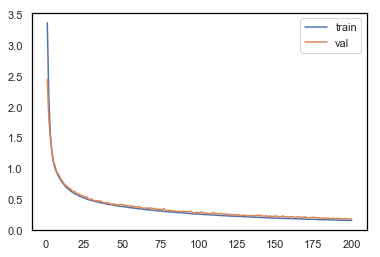

In [53]:
epochs=range(1,len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

plt.legend(['train','val'], loc='upper right')
plt.show()

In [57]:
print("테스트 정확도: %4f" % (model.evaluate(xtest,ytest)[1]))

30/30 [==============================] - 0s 33us/step
테스트 정확도: 1.000000


#### keras를 활용한 은닉층 구성

In [59]:
model=Sequential()
model.add(Dense(8, input_dim=4, activation='relu', init='uniform')) # init:초기값
# X=(1,4), W=(4,8), B=(1,8) = Y (1,8):출력
model.add(Dense(8, activation='relu')) # 2번째 계층부터는 input 데이터 필요없음
# 첫번째 계층에서 8개를 출력하므로 두번쨰 계층의 입력은 8개이고 출력도 8개이다.
# X=(1,8), W=(8,8)
model.add(Dense(3, activation='softmax')) # 입력 8개, 출력 3개
# X=(1,8), W=(8,3), B(1,3) = y (1,3)

         #손실함수
#MSE, CE(크로스엔트로피)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  


In [ ]:
model.fit(xtrain, ytrain, batch_size=len(trainx)) # 전체 데이터에 대해서 1에폭에 모든 매개변수 한번 수행
# 배치경사하강법 : 1에폭에 모든 매개변수 업데이트 한 번 수행

model.fit(xtrain, ytrain, batch_size=16) # 미니배치 : 16개를 배치사이즈 정하고 매개변수 업데이트 
# 미니배치 : 미니배치가 전체 데이터를 계산하는 것보다 빠름

model.fit(xtrain, ytrain, batch_size=1)
# SGD(확률적 경사 하강법) 

keras.optimizer.SGD(lr=0.01, momentum=0.9) # momentum:관성을 적용
# 경사하강법에 관성을 적용해 접선의 기울기 값을 적절한 비율만큼 반영하는 방법

#https://www.keras.io/optimizers

In [66]:
from keras.preprocessing.text import Tokenizer
t=Tokenizer()
fitText="The earth is an awesome place live" # 코퍼스
# t.fit_on_texts(fitText) # 문자 단위
t.fit_on_texts([fitText]) # 단어 단위
print(t.word_index)

test="The earth is an great place live"
t.texts_to_sequences([test])[0] # 2차원으로 출력되므로 [0] 붙여주기
# t.word_index와 동일하게 존재하지 않은 단어의 인덱스는 빠져서 출력

{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


[1, 2, 3, 4, 6, 7]

In [71]:
# padding:길이를 동일하게 맞춰주는 작업 => pad_sequence()
from keras.preprocessing.sequence import pad_sequences
print(pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=5))
# 5자리로 데이터의 앞쪽에서 0으로 값 채워짐
print(pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=3))
# 길이가 부족하면 맨 앞의 데이터가 날아감

[[ 0  0 10 20 30]
 [ 0  0  0 40 50]
 [ 0 60 70 80 90]]
[[10 20 30]
 [ 0 40 50]
 [70 80 90]]


In [72]:
print(pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=5, padding='pre'))
# 앞쪽이 채워짐
print(pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=5, padding='post'))
# 뒤쪽이 채워짐
# 데이터 전처리할 때, 데이터의 길이를 맞춰줘야할 때 활용

[[ 0  0 10 20 30]
 [ 0  0  0 40 50]
 [ 0 60 70 80 90]]
[[10 20 30  0  0]
 [40 50  0  0  0]
 [60 70 80 90  0]]


### 워드 임베딩 : 단어들을 밀집벡터로 변환하는 것
    - [00000000000100000000000...0000000]:희소벡터  
    - 희소벡터는 원핫인코딩으로 나타나 벡터의 차원이 커지고 대부분의 값이 0으로 채워져있으므로 낭비가 심함  
    - 이를 극복하고자 밀집벡터를 활용  
    - [0.1 0.5 -1.5 1.8]:밀집벡터(4차원, 실수)  
    - Embedding(정수로된 단어)
    - Embedding(단어집합크기, 벡터의 크기, 입력단어 시퀀스 길이)
    - Embedding(1000,2, 3) #1000개의 단어가 2차원 벡터로 표현, 임베딩하려는 대상 데이터의 shape
    - text=[['to','you','I'],['You','Hi','Good'],....] => 시퀀스의 길이 : 3
    

In [73]:
# Sequential : 층을 구성 => model => model.add()
# model=Sequential()
# model.add(Embedding(voc,size, 길이))

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [76]:
# fit():실제학습
# model.fit(xtrain, ytrain, epochs=10, batch_size=64, validation_data(xval, yval)) 
# 전체데이터를 10번 반복, 한번에 64개씩 읽어서 가중치 업데이트 
# model.evaluate(xtest, ytest, batch_size=32) 모델 평가
# model.predict(xinput, batch_size=32) 모델 예측
# model.save("my_model.h5") 모델 저장
# 모델 불러오기
# from keras.models import load_model
# model=load_model("my_model.h5")

In [83]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=x*w+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
feed={x:xdata,y:ydata}

saver=tf.train.Saver()
for i in range(2001):
    sess.run(train, feed_dict=feed)
    if i%20==0:
        print(i, sess.run(cost, feed_dict=feed))
        saver.save(sess,"Model/second",global_step=i)
saver.save(sess,"Model/first")

0 0.45963332
20 0.09698748
40 0.0366445
60 0.013845268
80 0.0052311234


W0814 13:51:44.920713 13124 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


100 0.00197646
120 0.0007467593
140 0.000282147
160 0.00010660268
180 4.0277217e-05
200 1.5217874e-05
220 5.749784e-06
240 2.1724252e-06
260 8.207823e-07
280 3.100719e-07
300 1.1715614e-07
320 4.4270603e-08
340 1.6722424e-08
360 6.324948e-09
380 2.3867226e-09
400 9.022614e-10
420 3.4003733e-10
440 1.2875508e-10
460 4.8411646e-11
480 1.863043e-11
500 6.9964776e-12
520 2.444267e-12
540 8.7159907e-13
560 3.2684966e-13
580 1.563194e-13
600 6.158037e-14
620 6.158037e-14
640 2.3684757e-14
660 4.7369517e-15
680 0.0
700 0.0
720 0.0
740 0.0
760 0.0
780 0.0
800 0.0
820 0.0
840 0.0
860 0.0
880 0.0
900 0.0
920 0.0
940 0.0
960 0.0
980 0.0
1000 0.0
1020 0.0
1040 0.0
1060 0.0
1080 0.0
1100 0.0
1120 0.0
1140 0.0
1160 0.0
1180 0.0
1200 0.0
1220 0.0
1240 0.0
1260 0.0
1280 0.0
1300 0.0
1320 0.0
1340 0.0
1360 0.0
1380 0.0
1400 0.0
1420 0.0
1440 0.0
1460 0.0
1480 0.0
1500 0.0
1520 0.0
1540 0.0
1560 0.0
1580 0.0
1600 0.0
1620 0.0
1640 0.0
1660 0.0
1680 0.0
1700 0.0
1720 0.0
1740 0.0
1760 0.0
1780 0.0
1800 0

'Model/first'

In [85]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=x*w+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess=tf.Session()
saver=tf.train.Saver()

latest=tf.train.latest_checkpoint('Model') # 가장 최근 모델 복원
print(latest)
saver.restore(sess,latest) # 복원한 모델을 현재 모델로 적용하기
print(sess.run(hf, feed_dict={x:[5,7]}))
# 

W0814 13:58:14.828764 13124 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Model\first


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable_14 not found in checkpoint
	 [[node save_4/RestoreV2 (defined at <ipython-input-85-251773614c86>:16) ]]

Original stack trace for 'save_4/RestoreV2':
  File "C:\Users\user\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\user\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\user\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\user\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-85-251773614c86>", line 16, in <module>
    saver=tf.train.Saver()
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 825, in __init__
    self.build()
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 837, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 875, in _build
    build_restore=build_restore)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 328, in _AddRestoreOps
    restore_sequentially)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 575, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1779, in restore_v2
    name=name)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [88]:
# 함수형 API 신경망 구성
from keras.layers import Input, Dense
from keras.models import Model

In [89]:
inputs=Input(shape=(10,)) # 입력 10개
h1=Dense(64, activation='relu')(inputs)
h2=Dense(64, activation='relu')(h1)
output=Dense(1, activation='sigmoid')(h2)
model=Model(inputs=inputs, outputs=output)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(데이터, 레이블)